# Deep CNN Image Classifier

* Name - Hozefa Beena wala
* Class - M.Sc. Data Science and Analytics
* Semester - 3rd Sem
* Subject - Deep Learning Assignment (MST-3)
* Roll No - DS5B-2113
* Session - 2021-23

### 1.1 Install Dependencies and Setup 

In [1]:
pip install tensorflow tensorflow-gpu opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip list

Package                      Version
---------------------------- ------------
absl-py                      1.2.0
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        21.4.0
Babel                        2.9.1
backcall                     0.2.0
beautifulsoup4               4.10.0
black                        22.1.0
bleach                       4.1.0
breadability                 0.1.20
bs4                          0.0.1
cachetools                   5.2.0
certifi                      2021.10.8
cffi                         1.15.0
chardet                      5.0.0
charset-normalizer           2.0.11
click                        8.0.3
colorama                     0.4.4
cycler                       0.11.0
Cython                       0.29.28
debugpy                      1.5.1
decorator                    5.1.1
defusedxml                   0.


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [5]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
# Avoid oom errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### 1.2 Remove dodgy images

In [16]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [17]:
data_dir = 'Data'

In [18]:
image_exts = ['jpeg','jpg','bmp','png']

In [19]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [20]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1-2.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Truly-Happy-People.jpg
154006829.jpg
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
227-2271622_happy-people-business-team-celebrating-png.png
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
8cxKy5g9i.jpg
960x0.jpg
A_Sep20_14_1189155141.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
blog_image_20180219221810890.jpg
brady-bunch-3.jpg
e162ccda8ce0f197f8863f327add9233.jpg
fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
friends-happy-190821-800x450.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740-1024x707.jpg
getty_152414899_97046097045006_68075.jpg
getty_478389113_970647970450091_99776.jpg
getty_494581822_130796.jpg
ge

In [27]:
img = cv2.imread(os.path.join('Data','happy','154006829.jpg'))

In [28]:
img.shape

(3744, 5616, 3)

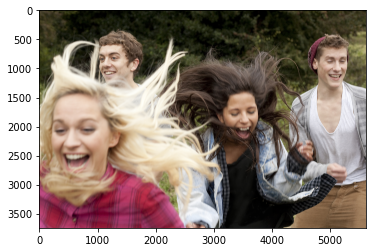

In [29]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

### 1.3 Load Data

In [32]:
tf.data.Dataset??

In [33]:
import numpy as np
from matplotlib import pyplot as plt

In [35]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 171 files belonging to 2 classes.


In [36]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [37]:
data_iterator = data.as_numpy_iterator()

In [38]:
data_iterator

In [46]:
# Get another batch from the iterator
batch = data_iterator.next()

In [47]:
len(batch)

2

In [48]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [49]:
# Class 1 = Sad
# Class 0 = Happy
batch[1]

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0])

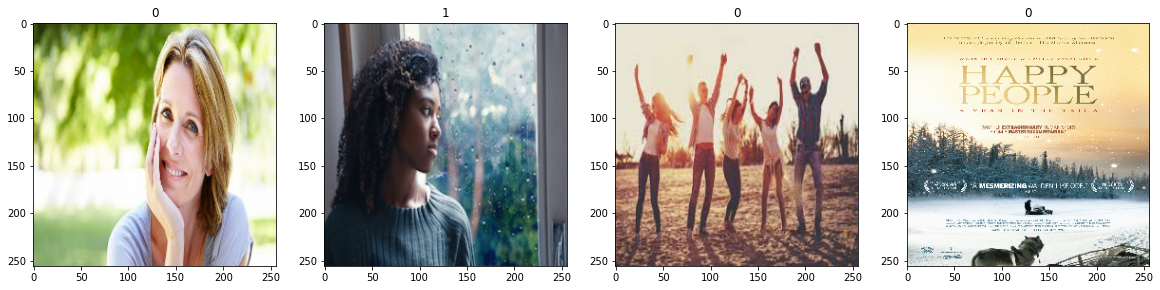

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [54]:
scaled = batch[0] / 255

In [56]:
scaled.max()

1.0

## 2. Preprocess Data

### 2.1 Scale Data 

In [57]:
data = data.map(lambda x,y: (x/255, y))

In [62]:
scaled_iterator = data.as_numpy_iterator()

In [64]:
batch = scaled_iterator.next()

In [67]:
batch[0].max()

1.0

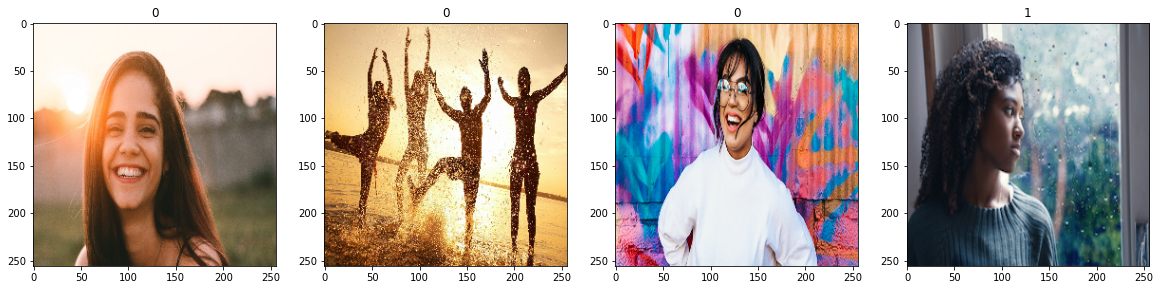

In [68]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split Data

In [69]:
len(data)

6

In [74]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [76]:
train_size+val_size+test_size

6

In [77]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [80]:
len(test)

1

## 3. Deep Model

### 3.1 Build Deep learning Model

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [82]:
model = Sequential()

In [83]:
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [84]:
 model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [85]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### 3.2 Train

In [86]:
logdir = 'logs'

In [87]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [88]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 11s 2s/step - loss: 0.8615 - accuracy: 0.5234 - val_loss: 0.6898 - val_accuracy: 0.5312
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.6659 - accuracy: 0.5859 - val_loss: 0.5079 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.6179 - accuracy: 0.5938 - val_loss: 0.5430 - val_accuracy: 0.6875
Epoch 4/20
4/4 [==============================] - 7s 2s/step - loss: 0.5560 - accuracy: 0.6562 - val_loss: 0.4583 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 0.5284 - accuracy: 0.7734 - val_loss: 0.4541 - val_accuracy: 0.8438
Epoch 6/20
4/4 [==============================] - 7s 2s/step - loss: 0.4158 - accuracy: 0.7734 - val_loss: 0.3582 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.3664 - accuracy: 0.8828 - val_loss: 0.3633 - val_accuracy: 0.8438
Epoch 8/20
4/4 [========================

### 3.3 Plot Performance

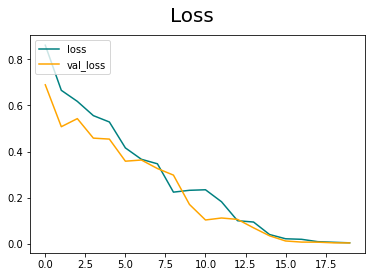

In [89]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

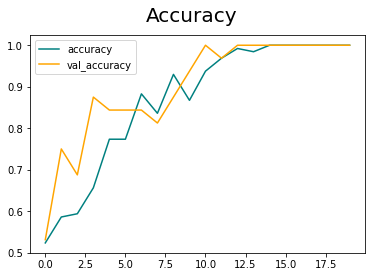

In [90]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 4. Evaluate Performance

### 4.1 Evaluate

In [91]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [92]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [93]:
len(test)

1

In [94]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 266ms/step


In [96]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


### 4.2 Test

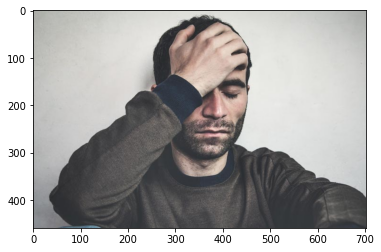

In [110]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

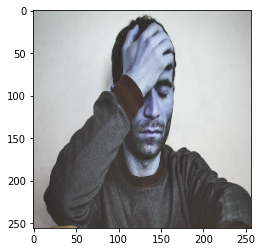

In [111]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [112]:
resize.shape

TensorShape([256, 256, 3])

In [113]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [114]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 60ms/step


In [115]:
yhat

array([[0.9952001]], dtype=float32)

In [116]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


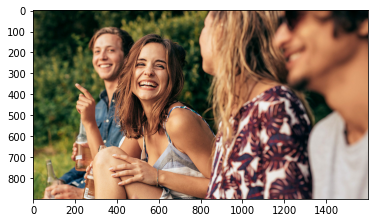

In [118]:
img = cv2.imread('happytest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

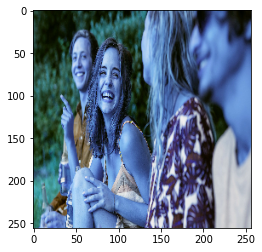

In [119]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [120]:
resize.shape

TensorShape([256, 256, 3])

In [121]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [122]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 63ms/step


In [123]:
yhat

array([[0.03225906]], dtype=float32)

In [124]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
